In [2]:
from elec_bol20 import *
import elec_bol20.util as ebu
import elec_bol20.nb_2020.z120_fu  as zfu
from elec_bol20.nb_2020.z120_fu import *

In [9]:
df = ebu.get_full_combined_2020()
df = zfu.add_point(df)

last comp merged
35600 35597 35600


In [10]:
(~df[COUNT]).sum()

0

In [11]:
df[PC].describe()

count    35460.000000
mean        50.202002
std         28.765997
min          0.003000
25%         25.547368
50%         50.163687
75%         75.293497
max        100.000000
Name: P_COMP, dtype: float64

In [12]:
df[VAL].sum() / df[VV].sum() * 100

55.0934909298245

In [13]:
def _run():
    dat = []
    N = 60
    B = 2
    df[COUNT] = True
    full_coverage = zfu.get_coverage(df, buffer=B)
    for i in np.linspace(0, 100, N)[1:]:
        P = i
        res = predict_p(df=df, p=P)
        counted_coverage = zfu.get_coverage(zfu.get_counted(df), buffer=B)

        cov = 100 - (counted_coverage.area / full_coverage.area * 100)

        res = {'p': i, **res, 'cov': cov}
        dat.append(res)
    pdf = pd.DataFrame(dat)

In [24]:
# run()
pout = os.path.join(ebu.DATA_PATH1,'z120_prediction_area.csv')
# pdf.to_csv(pout)
pdf = pd.read_csv(pout,index_col=0)

In [62]:
pdf['unc'] = pdf['cov']/3
pdf['m'] = -pdf['unc'] + pdf['pred'] - .1
pdf['M'] = pdf['unc'] + pdf['pred'] + .1
# pdf

In [63]:
RES = pdf.iloc[-1]['pred']

In [64]:
pdf['abs_res'] = (pdf['pred'] - RES).abs()

Text(0, 0.5, 'Predicción resultado final MAS [%]')

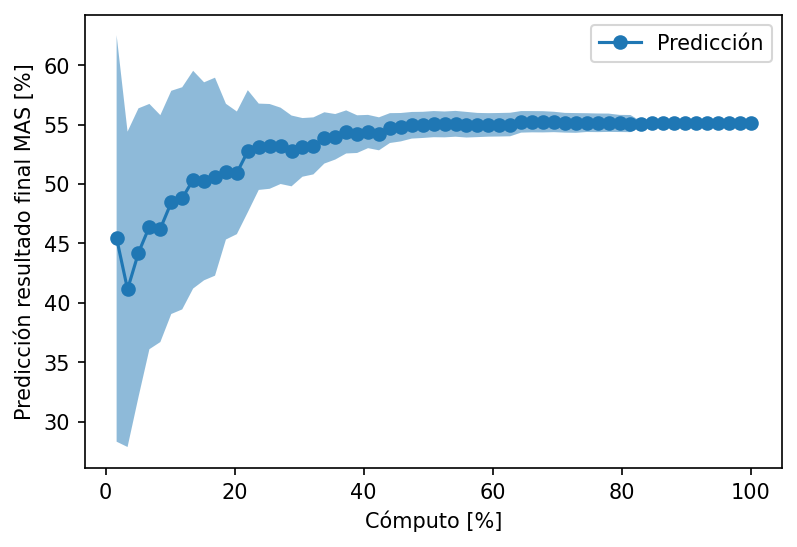

In [65]:
f,ax = plt.subplots(dpi=150)
pdf['Predicción'] = pdf['pred']
ax.fill_between(pdf['p'],pdf['m'],pdf['M'],alpha=.5)
pdf.plot(x='p', y='Predicción', marker='o',ax=ax)
ax.set_xlabel('Cómputo [%]')
ax.set_ylabel('Predicción resultado final MAS [%]')

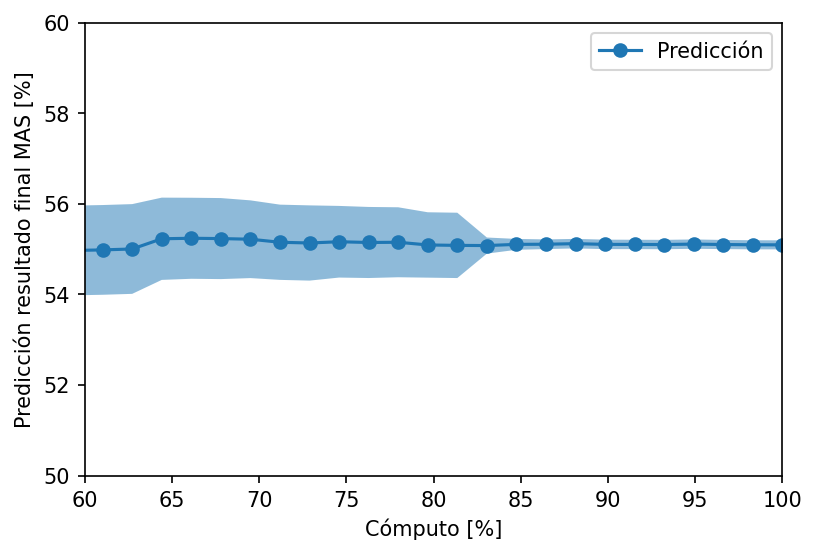

In [66]:
ax.set_xlim(60,100)
ax.set_ylim(50,60)
f

<AxesSubplot:xlabel='p'>

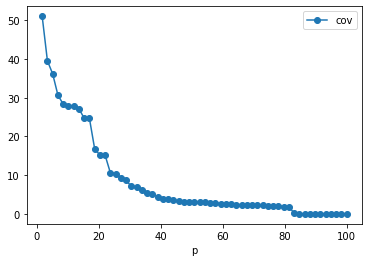

In [23]:
pdf.plot(x='p', y='cov', marker='o')

<AxesSubplot:xlabel='abs_res', ylabel='cov'>

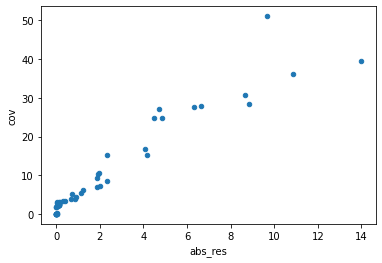

In [557]:
pdf.plot.scatter(x='abs_res', y='cov')

In [75]:
df_ = simple_split(df, 20)
cols = ['yj', 'xj', 'PAIS', 'MUN', 'REC', 'HAB', COUNT,'MAS']
bokeh.plotting.reset_output()
bokeh.plotting.output_notebook()
f: bokeh.plotting.Figure = bokeh.plotting.figure()
df_ = df_[df_[COUNT] == True]
s = bokeh.plotting.ColumnDataSource(df_[cols])
f.scatter('xj', 'yj', source=s, color='green',
#           size='HAB'
         )
bokeh.plotting.show(f)

Loading BokehJS ...

In [256]:
B = .3
P = 40

In [257]:
df = zfu.add_point(df)

In [258]:
full_coverage = zfu.get_coverage(df, buffer=B)

In [259]:
df = zfu.simple_split(df, P)
counted_coverage = zfu.get_coverage(zfu.get_counted(df), buffer=B)

<AxesSubplot:>

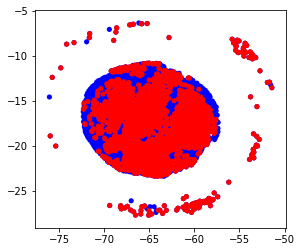

In [260]:
f, ax = plt.subplots()
gp.GeoSeries(full_coverage).plot(figsize=(10, 10), color='blue', ax=ax)
gp.GeoSeries(counted_coverage).plot(figsize=(10, 10), color='red', ax=ax)

In [263]:
diff = full_coverage.difference(counted_coverage)

<AxesSubplot:>

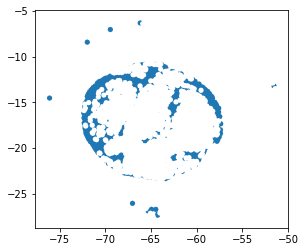

In [264]:
gp.GeoSeries(diff).plot()

In [265]:
diff.area / full_coverage.area

0.1631941696505674

In [338]:
import random

0.23604808973743452

In [352]:
dat = []
for i in range(1000):
    random.seed(i)
    r = random.random()
    dtest, dtrain = ebu.partition_df(df, r, random_state=i)
    dtest[COUNT] = False
    dtrain[COUNT] = True
    df = pd.concat([dtest, dtrain])
    # gp.GeoSeries(zfu.get_coverage(zfu.get_counted(df))).plot()
    res = ebu.single_pred(df=df, var=VAL, pred_mask=COUNT)
    res = {'i': i, 'p': r * 100, **res}
    dat.append(res)

KeyboardInterrupt: 

In [354]:
matplotlib.scale.SymmetricalLogScale

854

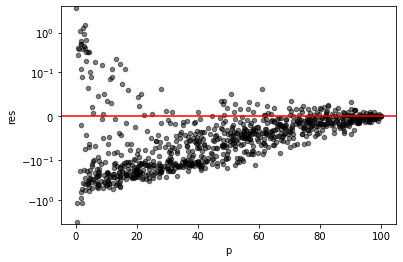

In [396]:
res_df = pd.DataFrame(dat)
res_df['res'] = res_df['pred'] - RES
f, ax = plt.subplots()
res_df.plot.scatter(x='p', y='res', ax=ax, alpha=.5, marker='o', color='k')
ax.axhline(0, c='r')
ax.set_yscale('symlog', linthresh=.1)

In [408]:
res_df['res_abs'] = res_df['res'].abs()
res_df.sort_values('res_abs', ascending=False)

,i,p,pred,res,res_abs
139,139,0.151017,59.336027,4.242536,4.242536
737,737,0.277867,51.511018,-3.582473,3.582473
812,812,3.132633,56.685276,1.591785,1.591785
590,590,2.511040,56.384474,1.290983,1.290983
849,849,0.298267,53.921712,-1.171779,1.171779
...,...,...,...,...,...
24,24,71.234299,55.093649,0.000158,0.000158
152,152,97.765332,55.093635,0.000144,0.000144
320,320,44.552989,55.093361,-0.000130,0.000130
625,625,99.803857,55.093418,-0.000073,0.000073


In [490]:
dtest, dtrain = ebu.partition_df(df, .005,
                                 #                                 random_state=10
                                 )
dtest[COUNT] = False
dtrain[COUNT] = True
df = pd.concat([dtest, dtrain]).sort_index()
ebu.single_pred(df=df, var=VAL, pred_mask=COUNT)

{'pred': 55.512003258520856}

In [479]:
items = ["a", "b", "c", "d"]

distribution = [.99, .005, .005, 0]
num_samples = 4
samples = np.random.choice(items, 2, False, distribution)
samples

array(['a', 'c'], dtype='<U1')

In [503]:
df['covered'] = [p.within(counted_coverage) for p in df.geometry]

In [509]:
df[~df['covered']]['HAB'].sum() / df['HAB'].sum() * 100

41.83405500061822